## CME538 GROUP PROJECT
TTC SUBWAY, TTC BUS AND OC-TRANSPO EXPLORATORY DATA ANALYSIS


### Set up Notebook

In [193]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [194]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")
octranspo_df = pd.read_csv("OC_Transpo_Bus_Info_With_Times.csv")

## TTC SUBWAY

In [195]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


### Outliers

In [196]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]

# View DataFrame
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102486 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Date        102486 non-null  object
 2   Time        102486 non-null  object
 3   Day         102486 non-null  object
 4   Station     102486 non-null  object
 5   Code        102486 non-null  object
 6   Min Delay   102486 non-null  int64 
 7   Min Gap     102486 non-null  int64 
 8   Bound       73761 non-null   object
 9   Line        102157 non-null  object
 10  Vehicle     102486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.4+ MB


In [197]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,102486.000000,102486.000000,102486.000000,102486.00000
mean,54011.082167,1.729475,3.081777,3530.84354
std,31069.249287,2.529287,4.378530,2654.52430
min,0.000000,0.000000,0.000000,0.00000
25%,27281.250000,0.000000,0.000000,0.00000
50%,53817.500000,0.000000,0.000000,5167.00000
75%,80963.750000,3.000000,7.000000,5646.00000
max,108003.000000,10.000000,27.000000,69021.00000


C:\Users\diana\AppData\Local\Temp\ipykernel_696\1108744901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')


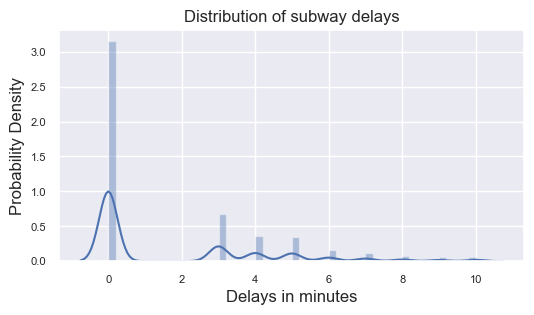

In [198]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

In [199]:
#Merge Date and Time Columns
ttc_subway_df['Datetime'] = pd.to_datetime(ttc_subway_df['Date']+' '+ ttc_subway_df['Time'])
ttc_subway_df = ttc_subway_df.drop(['Date', 'Time'], axis=1)
ttc_subway_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Datetime
0,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022-01-01 15:59:00
1,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022-01-01 02:23:00
2,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022-01-01 22:00:00
3,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022-01-01 02:28:00
4,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022-01-01 02:34:00


### Time-based indexing

In [200]:
# Set the data column as the index
ttc_subway_df.set_index('Datetime', inplace = True)
ttc_subway_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Datetime,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [201]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df['hour'] = ttc_subway_df.index.hour

In [202]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Day         102486 non-null  object
 2   Station     102486 non-null  object
 3   Code        102486 non-null  object
 4   Min Delay   102486 non-null  int64 
 5   Min Gap     102486 non-null  int64 
 6   Bound       73761 non-null   object
 7   Line        102157 non-null  object
 8   Vehicle     102486 non-null  int64 
 9   year        102486 non-null  int32 
 10  month       102486 non-null  int32 
 11  month_day   102486 non-null  int32 
 12  hour        102486 non-null  int32 
dtypes: int32(4), int64(4), object(5)
memory usage: 9.4+ MB


### Seasonal changes

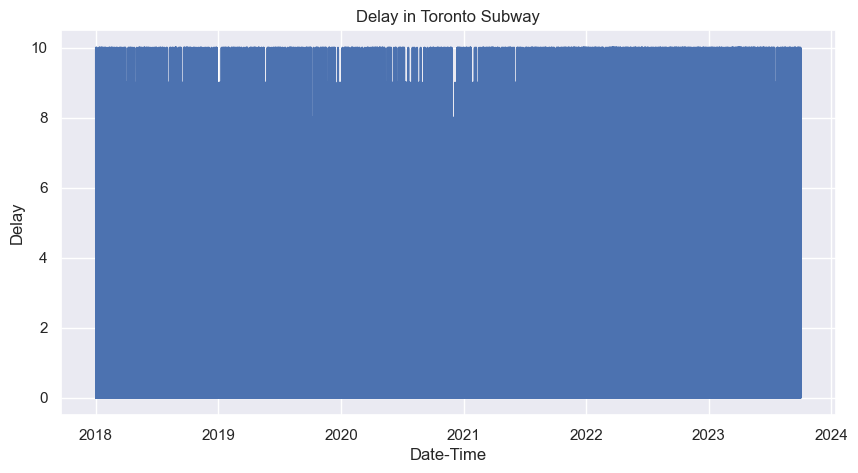

In [203]:
#Plot Toronto Delay 
sns.set()  # Resets styles to default
plt.figure(figsize=(10,5))
sns.lineplot(x=ttc_subway_df.index, y=ttc_subway_df['Min Delay'],errorbar= None)

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

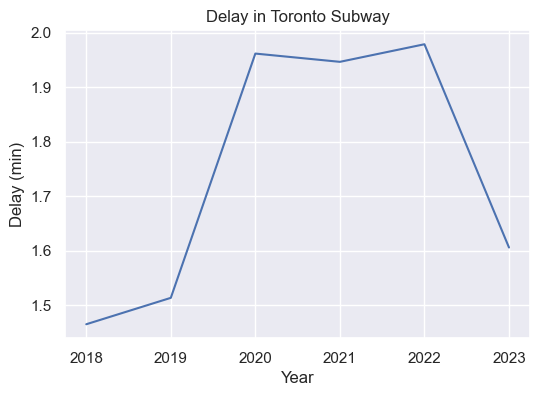

In [204]:
#Plot Toronto Delay by year 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['year'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

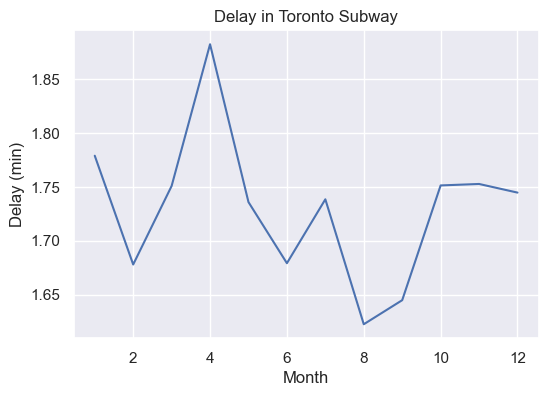

In [205]:
#Plot Toronto Delay by month 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

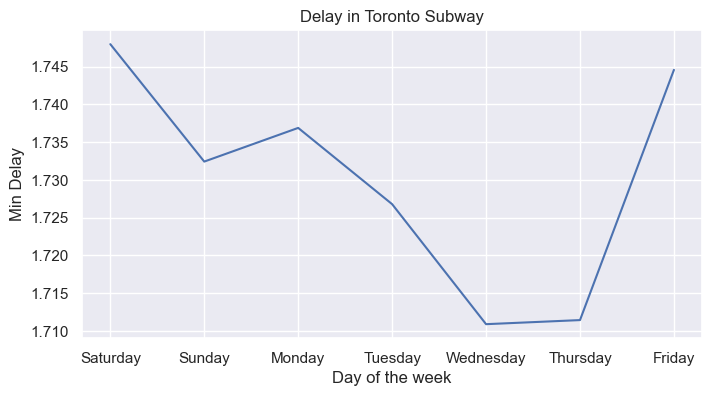

In [206]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

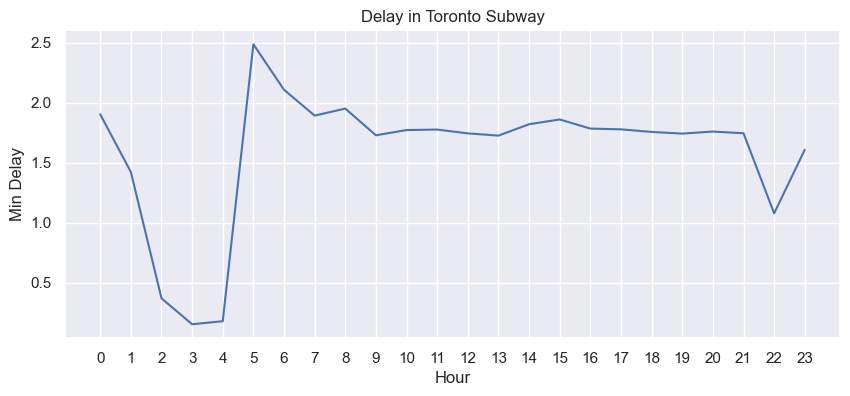

In [207]:
#Plot Toronto subway Delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['hour'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Hour', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.xticks(range(0, 24, 1))

plt.show()

In [208]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle,year,month,month_day,hour
count,102486.000000,102486.000000,102486.000000,102486.00000,102486.000000,102486.000000,102486.000000,102486.000000
mean,54011.082167,1.729475,3.081777,3530.84354,2020.405851,6.291269,15.865074,13.056144
std,31069.249287,2.529287,4.378530,2654.52430,1.750560,3.403803,8.827406,6.395107
min,0.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,0.000000
25%,27281.250000,0.000000,0.000000,0.00000,2019.000000,3.000000,8.000000,8.000000
50%,53817.500000,0.000000,0.000000,5167.00000,2020.000000,6.000000,16.000000,14.000000
75%,80963.750000,3.000000,7.000000,5646.00000,2022.000000,9.000000,24.000000,18.000000
max,108003.000000,10.000000,27.000000,69021.00000,2023.000000,12.000000,31.000000,23.000000


In [209]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Day         102486 non-null  object
 2   Station     102486 non-null  object
 3   Code        102486 non-null  object
 4   Min Delay   102486 non-null  int64 
 5   Min Gap     102486 non-null  int64 
 6   Bound       73761 non-null   object
 7   Line        102157 non-null  object
 8   Vehicle     102486 non-null  int64 
 9   year        102486 non-null  int32 
 10  month       102486 non-null  int32 
 11  month_day   102486 non-null  int32 
 12  hour        102486 non-null  int32 
dtypes: int32(4), int64(4), object(5)
memory usage: 9.4+ MB


In [210]:
ttc_subway_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour
Datetime,,,,,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2


### Peak and off-peak hours
Add a column to specify if it is a peak hour or not. 
According to the TTC peak hours are 6-9a.m and 3-7p.m

In [211]:
#Add peak hours column
#Function to determine if a given datime is in peak hour

def is_peak_hour(dt):
    hour = dt.hour
    return 1 if ((6 <= hour <= 9) or (15 <= hour <= 19)) else 0

#Apply function to create a new column 'peakhour'

ttc_subway_df['peakhour'] = ttc_subway_df.index.to_series().apply(is_peak_hour)

ttc_subway_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour
Datetime,,,,,,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15,1
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2,0
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22,0
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2,0
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2,0


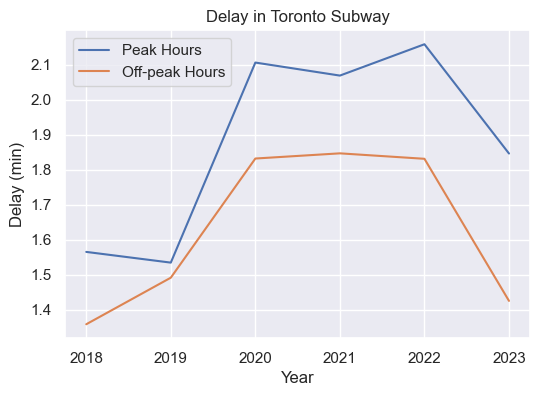

In [212]:
#Plot Toronto subway Delay by year with peak hours


sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

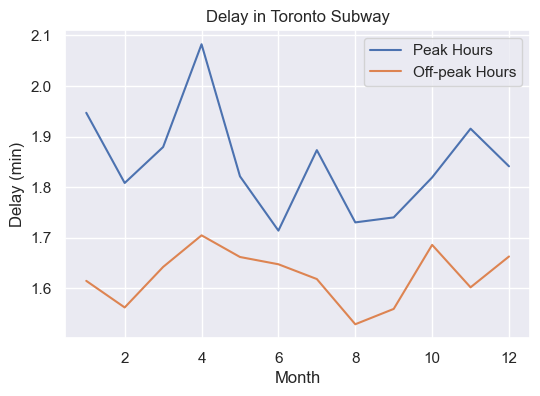

In [213]:
#Plot Toronto subway Delay by month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

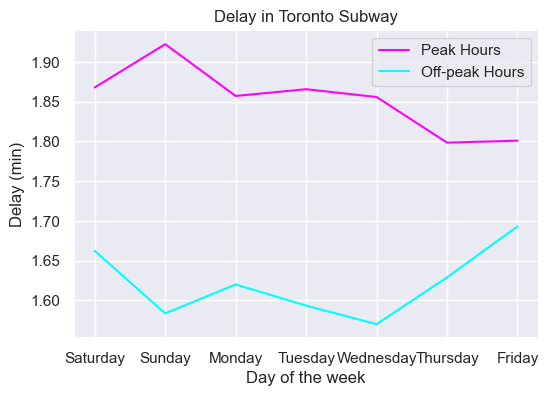

In [214]:
#Plot Toronto subway Delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

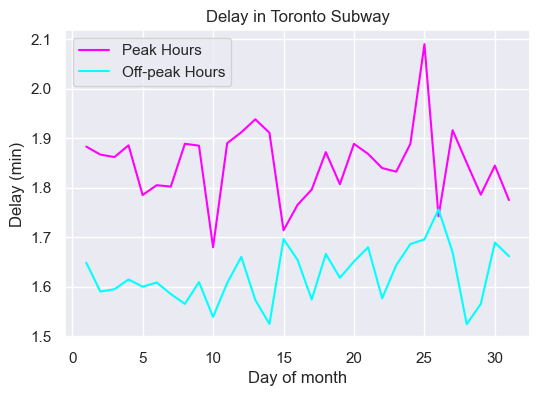

In [215]:
#Plot Toronto subway Delay by day of the month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

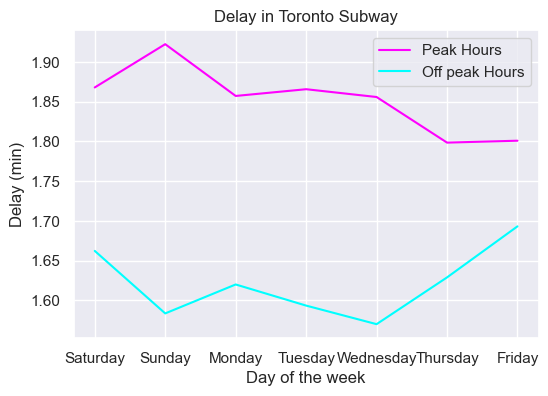

In [216]:
#Plot Toronto subway Delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

### Seasons

In [217]:
# Add seasons column
def get_season(month):
    if 3 <= month <=5:
        return 'Spring'
    elif 6<=month <=8:
        return 'Summer'
    elif 9<=month <=11:
        return 'Fall'
    else: 
        return 'Winter'

#Apply the function
ttc_subway_df['season'] = ttc_subway_df['month'].apply(get_season)

ttc_subway_df.tail()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,
2021-12-31 01:10:00,107999,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591,2021,12,31,1,0,Winter
2021-12-31 01:12:00,108000,Friday,FINCH STATION,SUDP,5,10,S,YU,5983,2021,12,31,1,0,Winter
2021-12-31 01:21:00,108001,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046,2021,12,31,1,0,Winter
2021-12-31 01:37:00,108002,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536,2021,12,31,1,0,Winter
2021-12-31 07:00:00,108003,Friday,DON MILLS STATION,TUSC,0,0,E,SHP,6146,2021,12,31,7,1,Winter


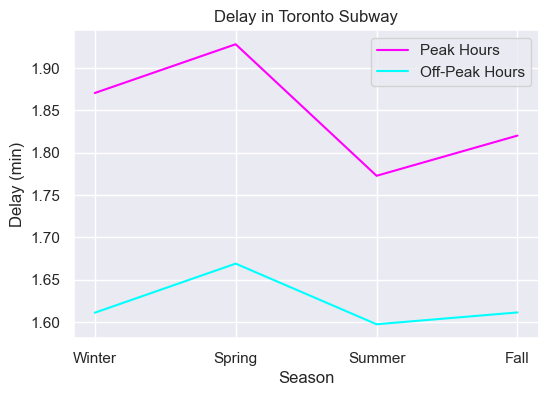

In [218]:
#Plot Toronto subway Delay by season with peak hours

sns.set()  
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

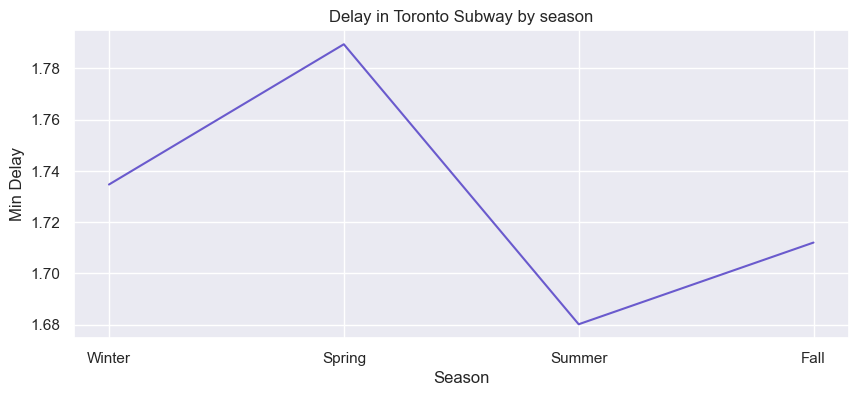

In [219]:
#Plot Toronto subway Delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['season'], y=ttc_subway_df['Min Delay'],errorbar=None, color='#6A5ACD')

# Set labels 
plt.xlabel('Season', fontsize=12)
plt.title("Delay in Toronto Subway by season")

plt.show()

### Unique Values

In [220]:
# Unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



Number of unique Stations: 826
Number of unique codes: 206
Number of unique bound: 7
Number of unique lines: 55
Number of unique vehicles: 1068


### Stations

In [221]:
#Make a list of the unique "Station' values
unique_stations =  ttc_subway_df['Station'].unique()
print(unique_stations)
unique_stations_list = unique_stations.tolist()

['LAWRENCE EAST STATION' 'SPADINA BD STATION' 'KENNEDY SRT STATION TO'
 'VAUGHAN MC STATION' 'EGLINTON STATION' 'QUEEN STATION'
 'DAVISVILLE STATION' 'ST PATRICK STATION' 'PAPE STATION' 'WILSON STATION'
 'KENNEDY BD STATION' 'FINCH STATION' 'YONGE BD STATION'
 'ST ANDREW STATION' 'MAIN STREET STATION' 'HIGH PARK STATION'
 'GREENWOOD STATION' 'COXWELL STATION' 'WELLESLEY STATION'
 'SHEPPARD WEST STATION' 'BLOOR STATION' 'UNION STATION'
 'ST GEORGE YUS STATION' 'ROSEDALE STATION' 'ISLINGTON STATION'
 'HIGHWAY 407 STATION' 'KIPLING STATION' 'YONGE/UNIVERSITY AND B'
 'ST GEORGE BD STATION' 'CHRISTIE STATION' 'BESSARION STATION'
 'MCCOWAN STATION' 'ST CLAIR WEST STATION' 'YORKDALE STATION'
 'WARDEN STATION' 'COLLEGE STATION' 'RUNNYMEDE STATION' 'DUPONT STATION'
 'KEELE STATION' 'LAWRENCE WEST STATION' 'LANSDOWNE STATION'
 'NORTH YORK CTR STATION' 'DUNDAS STATION' 'DUNDAS WEST STATION'
 'ROYAL YORK STATION' 'FINCH WEST STATION' 'SHERBOURNE STATION'
 'KENNEDY SRT STATION' 'ELLESMERE STATION' 

### Codes

In [222]:
#Make a list of the unique "Code' values
unique_codes =  ttc_subway_df['Code'].unique()
unique_codes_list = unique_codes.tolist()
print('list of codes:',unique_codes_list)

#Make a list of the unique "Bound' values
unique_bound =  ttc_subway_df['Bound'].unique()
unique_bound_list = unique_bound.tolist()
print('List of bound:',unique_bound_list)

#Make a list of the unique "Lines' values
unique_lines =  ttc_subway_df['Line'].unique()
unique_lines_list = unique_lines.tolist()
print('List of lines:',unique_lines_list)

list of codes: ['SRDP', 'MUIS', 'MRO', 'MUATC', 'MUNCA', 'TUATC', 'MUSC', 'TUNOA', 'TUO', 'SUO', 'PUOPO', 'MUIRS', 'MUIE', 'SUDP', 'SUUT', 'MUSAN', 'MUD', 'MUPR1', 'MUO', 'EUPI', 'TUMVS', 'MUI', 'TRNOA', 'SUAE', 'TRO', 'PUSSW', 'EUDO', 'PUMEL', 'SUAP', 'TUSC', 'PUMST', 'PUSAC', 'MUPAA', 'SUSA', 'PUSTS', 'PUSIS', 'ERDO', 'MRTO', 'EUYRD', 'EUSC', 'MUTO', 'TUNIP', 'TUOS', 'PUSO', 'ERCD', 'ERTC', 'TUCC', 'MUCL', 'SRSA', 'MUIR', 'EUNT', 'MRPAA', 'SUG', 'SUEAS', 'TUSUP', 'EUOE', 'MRNOA', 'PUMO', 'EUO', 'MUNOA', 'PUTD', 'MUPLC', 'PUSTC', 'ERRA', 'PRO', 'SUPOL', 'PUTO', 'SUROB', 'MRDD', 'EUCD', 'MUDD', 'TUS', 'MUTD', 'TRST', 'TUST', 'EUAC', 'MRUI', 'TUOPO', 'TUML', 'MRWEA', 'MRPLA', 'MUWEA', 'MUFM', 'PUTOE', 'PUTIS', 'PUEO', 'EUBK', 'EUTR', 'PUSRA', 'EUCA', 'MRIE', 'PUSI', 'PUSNT', 'PRSO', 'PUTR', 'ERLV', 'EUAL', 'PUTIJ', 'PRSL', 'TRTC', 'PUTWZ', 'EUBO', 'PUSZC', 'MUWR', 'MRCL', 'PUCSS', 'EUME', 'EUATC', 'MRSAN', 'PREL', 'ERBO', 'SRO', 'TUSET', 'SRUT', 'ERHV', 'ERO', 'MRPLB', 'TRNCA', 'PUTDN',

In [223]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Day         102486 non-null  object
 2   Station     102486 non-null  object
 3   Code        102486 non-null  object
 4   Min Delay   102486 non-null  int64 
 5   Min Gap     102486 non-null  int64 
 6   Bound       73761 non-null   object
 7   Line        102157 non-null  object
 8   Vehicle     102486 non-null  int64 
 9   year        102486 non-null  int32 
 10  month       102486 non-null  int32 
 11  month_day   102486 non-null  int32 
 12  hour        102486 non-null  int32 
 13  peakhour    102486 non-null  int64 
 14  season      102486 non-null  object
dtypes: int32(4), int64(5), object(6)
memory usage: 10.9+ MB


## TTC BUS 

In [242]:
ttc_bus_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15,1,Winter
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2,0,Winter
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22,0,Winter
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2,0,Winter
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2,0,Winter


In [243]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle,year,month,month_day,hour,peakhour
count,102486.000000,102486.000000,102486.000000,102486.00000,102486.000000,102486.000000,102486.000000,102486.000000,102486.000000
mean,54011.082167,1.729475,3.081777,3530.84354,2020.405851,6.291269,15.865074,13.056144,0.473528
std,31069.249287,2.529287,4.378530,2654.52430,1.750560,3.403803,8.827406,6.395107,0.499301
min,0.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,0.000000,0.000000
25%,27281.250000,0.000000,0.000000,0.00000,2019.000000,3.000000,8.000000,8.000000,0.000000
50%,53817.500000,0.000000,0.000000,5167.00000,2020.000000,6.000000,16.000000,14.000000,0.000000
75%,80963.750000,3.000000,7.000000,5646.00000,2022.000000,9.000000,24.000000,18.000000,1.000000
max,108003.000000,10.000000,27.000000,69021.00000,2023.000000,12.000000,31.000000,23.000000,1.000000


### Outliers

In [244]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1_bus= ttc_bus_df['Min Delay'].quantile(0.25)
Q3_bus= ttc_bus_df['Min Delay'].quantile(0.75)
IQR_bus =Q3_bus-Q1_bus

#Define the bounds for outlier removal
lower_bound_bus= Q1_bus-1.5*IQR
upper_bound_bus= Q3_bus +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_bus_df['Min Delay']<= upper_bound_bus)
ttc_bus_df = ttc_bus_df[mask]

# View DataFrame
ttc_bus_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101268 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  101268 non-null  int64 
 1   Day         101268 non-null  object
 2   Station     101268 non-null  object
 3   Code        101268 non-null  object
 4   Min Delay   101268 non-null  int64 
 5   Min Gap     101268 non-null  int64 
 6   Bound       72549 non-null   object
 7   Line        100939 non-null  object
 8   Vehicle     101268 non-null  int64 
 9   year        101268 non-null  int32 
 10  month       101268 non-null  int32 
 11  month_day   101268 non-null  int32 
 12  hour        101268 non-null  int32 
 13  peakhour    101268 non-null  int64 
 14  season      101268 non-null  object
dtypes: int32(4), int64(5), object(6)
memory usage: 10.8+ MB


In [245]:
#Merge Date and Time Columns
ttc_bus_df['Datetime'] = pd.to_datetime(ttc_bus_df['Date']+' '+ ttc_bus_df['Time'])
ttc_bus_df = ttc_bus_df.drop(['Date', 'Time'], axis=1)
ttc_bus_df.head()

KeyError: 'Date'

In [246]:
# Set the datetime colum as the index
ttc_bus_df.set_index('Datetime', inplace = True)
ttc_bus_df.head()

KeyError: "None of ['Datetime'] are in the columns"

In [247]:
# Add new columns 'year', 'month' and 'month_day' that indicate the year, month and day associated with each observation

ttc_bus_df['year'] = ttc_bus_df.index.year
ttc_bus_df['month'] = ttc_bus_df.index.month
ttc_bus_df['month_day'] = ttc_bus_df.index.day
ttc_bus_df['hour'] = ttc_bus_df.index.hour

### Peak hours

In [248]:
#Add peak hours column
#Apply function to create a new column 'peakhour'
ttc_bus_df['peakhour'] = ttc_bus_df.index.to_series().apply(is_peak_hour)

ttc_bus_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15,1,Winter
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2,0,Winter
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22,0,Winter
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2,0,Winter
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2,0,Winter


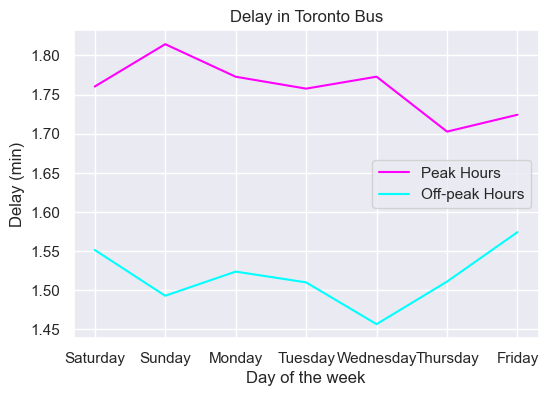

In [249]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()

### Season

In [250]:
#Apply the function
ttc_bus_df['season'] = ttc_bus_df['month'].apply(get_season)

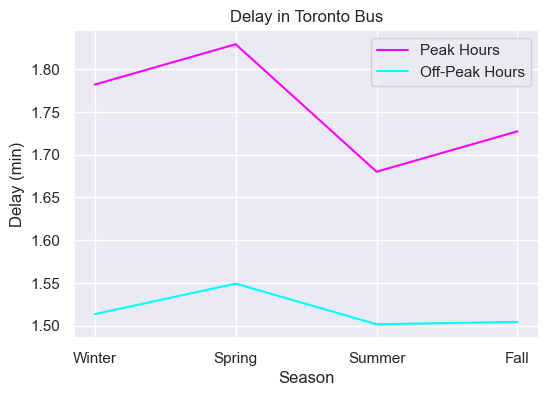

In [251]:
# Plot Toronto bus Delay by season with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()


## TTC STREETCAR

## OC TRANSPO

In [234]:
octranspo_df.head()

,Unnamed: 0,bus_stop,stop_code,stop_description,route_number,longitude,latitude,gps_speed,trip_start_time,adj_sched_time,adj_age,call_time,stop_id,start_time,stop_sequence,arrival_datetime,call_time_plus_adj
0,0,6941,4055,CHESTERTON / ASSINIBOINE,111,-75.720689,45.351385,18.0,14:43:00,1,0.93,2023-11-29 16:42:39,NaN,NaN,NaN,NaN,0 2023-11-29 16:43:39\r\n1 2023-11-2...
1,1,6941,4055,CHESTERTON / ASSINIBOINE,111,-75.706359,45.375254,12.0,14:58:00,14,0.65,2023-11-29 16:42:39,NaN,NaN,NaN,NaN,0 2023-11-29 16:56:39\r\n1 2023-11-2...
2,2,6941,4055,CHESTERTON / ASSINIBOINE,111,NaN,NaN,NaN,15:12:00,28,-1.00,2023-11-29 16:42:39,NaN,NaN,NaN,NaN,0 2023-11-29 17:10:39\r\n1 2023-11-2...
3,3,572,4055,CHESTERTON / ASSINIBOINE,111,-75.720689,45.351385,18.0,14:43:00,1,0.93,2023-11-29 16:42:40,NaN,NaN,NaN,NaN,0 2023-11-29 16:43:39\r\n1 2023-11-2...
4,4,572,4055,CHESTERTON / ASSINIBOINE,111,-75.706359,45.375254,12.0,14:58:00,14,0.65,2023-11-29 16:42:40,NaN,NaN,NaN,NaN,0 2023-11-29 16:56:39\r\n1 2023-11-2...


## Montreal 

In [235]:
stm_subway_df =pd.read_csv('STM Incidents métro.csv')

In [236]:
stm_subway_df.head()


,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,Porte,Urgence métro,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire
0,S01011901,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,...,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
1,S01011902,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,...,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
2,S01011903,S,Autres,Autres,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,...,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
3,S01011904,S,Autres,Autres,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,...,0,0,0,#,2019,2019-01,1,1,2,2019-01-01
4,S01011905,S,Autres,Autres,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,...,0,0,0,#,2019,2019-01,1,1,2,2019-01-01


## Mode of Transportation comparison

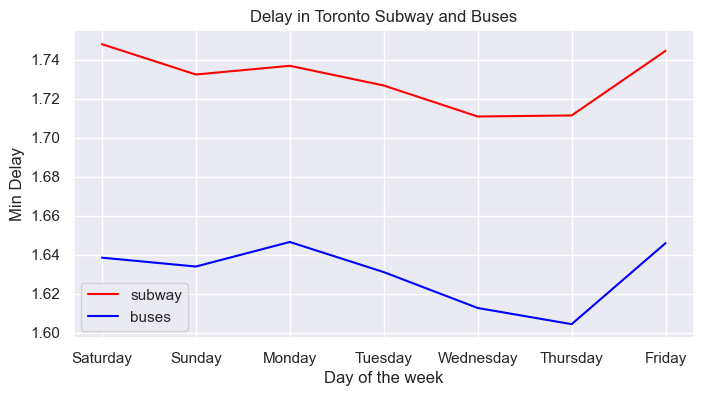

In [253]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['Day'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0
#plt.ylim(0, 3.5)
plt.show()

In [238]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Day         102486 non-null  object
 2   Station     102486 non-null  object
 3   Code        102486 non-null  object
 4   Min Delay   102486 non-null  int64 
 5   Min Gap     102486 non-null  int64 
 6   Bound       73761 non-null   object
 7   Line        102157 non-null  object
 8   Vehicle     102486 non-null  int64 
 9   year        102486 non-null  int32 
 10  month       102486 non-null  int32 
 11  month_day   102486 non-null  int32 
 12  hour        102486 non-null  int32 
 13  peakhour    102486 non-null  int64 
 14  season      102486 non-null  object
dtypes: int32(4), int64(5), object(6)
memory usage: 10.9+ MB


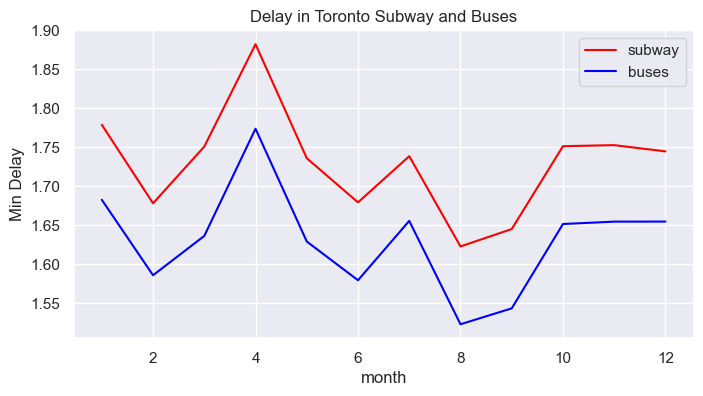

In [254]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['month'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('month', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0

plt.show()
